## Explanation of Notation

- **$u(x,t)$:**  
  Represents the unknown function we are solving for. In our examples:
  - In the **Heat Equation**, $u(x,t)$ represents temperature.
  - In **Burgers' Equation**, $u(x,t)$ represents velocity.
  It is a function of both space ($x$) and time ($t$).

- **Partial Derivatives:**
  - **$u_t$:**  
    The partial derivative of $u(x,t)$ with respect to time $t$, i.e.,  
    $$ u_t = \frac{\partial u}{\partial t}. $$
  - **$u_{xx}$:**  
    The second partial derivative of $u(x,t)$ with respect to space $x$, i.e.,  
    $$ u_{xx} = \frac{\partial^2 u}{\partial x^2}. $$

- **Constants:**
  - **$\alpha$:**  
    The thermal diffusivity in the Heat Equation, which governs the rate of heat diffusion.
  - **$\nu$:**  
    The viscosity in Burgers' Equation, controlling the relative strength of diffusion compared to convection.

- **Finite Difference Notation:**
  - **Spatial Step ($\Delta x$):**  
    The distance between two consecutive grid points in the spatial domain.
  - **Time Step ($\Delta t$):**  
    The increment in time used in the numerical scheme.
  - **First Derivative (Central Difference):**
    $$ u_x \approx \frac{u(x+\Delta x) - u(x-\Delta x)}{2\Delta x}, $$
    which approximates $u_x = \frac{\partial u}{\partial x}$.
  - **Second Derivative (Central Difference):**
    $$ u_{xx} \approx \frac{u(x+\Delta x) - 2u(x) + u(x-\Delta x)}{(\Delta x)^2}. $$

- **Time Stepping (Forward Euler Method):**  
  In the discrete setting, if $u_i^n$ denotes the approximation of $u(x_i, t_n)$ at spatial point $x_i$ and time $t_n$, then the forward Euler update is given by:
  $$ u_i^{n+1} = u_i^n + \Delta t \, (\text{spatial derivative approximations}). $$
  Here:
  - The subscript $i$ refers to the spatial grid index.
  - The superscript $n$ refers to the time step index.


# Introduction to PDEs, Nonlinear PDEs, and Finite Difference Numerical Solvers

In this notebook we will:
- Introduce what partial differential equations (PDEs) are.
- Discuss the difference between linear and nonlinear PDEs.
- Learn about finite difference methods for numerically solving PDEs.
- Implement and visualize solutions for two examples:
  - The **Heat Equation** (a linear PDE).
  - **Burgers' Equation** (a canonical nonlinear PDE).

This notebook is meant to serve as a tutorial for understanding these important topics in applied mathematics and computational science.

## What are PDEs?

A **partial differential equation (PDE)** is an equation that involves partial derivatives of an unknown function of multiple variables. Many physical phenomena such as heat conduction, fluid flow, and wave propagation can be modeled by PDEs.

**Examples:**
- **Heat Equation (Linear):**  
  $$ u_t = \alpha\, u_{xx}, $$
  where $u(x,t)$ represents temperature and $\alpha$ is the thermal diffusivity.

- **Burgers' Equation (Nonlinear):**  
  $$ u_t + u\, u_x = \nu\, u_{xx}, $$
  where $u(x,t)$ might represent velocity in a fluid and $\nu$ is the viscosity.

Understanding these equations and their numerical approximations is key to simulating many physical systems.

## Finite Difference Methods

Finite difference methods approximate derivatives by differences between function values at discrete grid points. For example, for a function $u(x)$:

- **First derivative (central difference):**
  $$ u_x \approx \frac{u(x+\Delta x) - u(x-\Delta x)}{2\Delta x} $$
- **Second derivative (central difference):**
  $$ u_{xx} \approx \frac{u(x+\Delta x) - 2u(x) + u(x-\Delta x)}{(\Delta x)^2} $$

Time derivatives can be approximated using forward or backward differences. For instance, a forward Euler scheme in time gives:
$$ u_i^{n+1} = u_i^n + \Delta t \, (\text{spatial derivative approximations}). $$

In the following sections we will apply these ideas to solve the Heat and Burgers' equations.


In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Configure matplotlib for inline display in Jupyter
%matplotlib ipympl

## Example 1: The 1D Heat Equation

We consider the heat equation:
$$ u_t = \alpha\, u_{xx}, $$
on the spatial domain $x \in [-1, 1]$ and time $t \ge 0$.

We will use:
- **Central differences** for the spatial second derivative.
- **Forward Euler** for the time stepping.

The initial condition and Dirichlet boundary conditions (fixed temperature at the endpoints) will be specified.


Heat equation simulation complete. Collected snapshots shape: (51, 101)


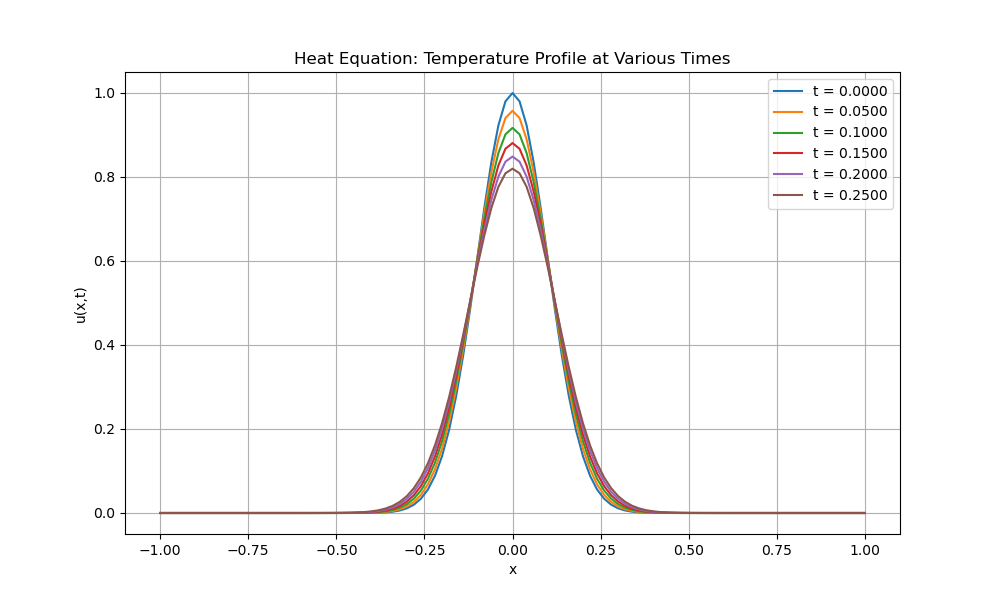

In [5]:
# Simulation parameters for the heat equation
nx = 101                # Number of spatial grid points
x = np.linspace(-1, 1, nx)
dx = x[1] - x[0]        # Spatial step size

nt = 500                # Number of time steps
dt = 0.0005             # Time step size
alpha = 0.01            # Thermal diffusivity

# Initial condition: a Gaussian pulse
u0 = np.exp(-50 * x**2)

# Apply Dirichlet boundary conditions: u(-1,t)=u(1,t)=0
def apply_boundary(u):
    u[0] = 0
    u[-1] = 0
    return u

# Prepare initial state
u = u0.copy()
u = apply_boundary(u)

# Prepare a container for snapshots for visualization
snapshots_heat = [u.copy()]

def step_heat(u, dt, dx, alpha):
    u_new = u.copy()
    # Update interior points with the finite difference scheme
    for i in range(1, len(u)-1):
        u_new[i] = u[i] + dt * alpha * (u[i+1] - 2*u[i] + u[i-1]) / (dx**2)
    u_new = apply_boundary(u_new)
    return u_new

# Time integration loop for the heat equation
for n in range(nt):
    u = step_heat(u, dt, dx, alpha)
    if n % 10 == 0:
        snapshots_heat.append(u.copy())

snapshots_heat = np.array(snapshots_heat)
print("Heat equation simulation complete. Collected snapshots shape:", snapshots_heat.shape)

# Plot the solution of the heat equation at a few time instants
plt.figure(figsize=(10, 6))
time_indices = np.linspace(0, snapshots_heat.shape[0]-1, 6, dtype=int)
for idx in time_indices:
    plt.plot(x, snapshots_heat[idx, :], label=f"t = {idx*10*dt:.4f}")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title("Heat Equation: Temperature Profile at Various Times")
plt.legend()
plt.grid(True)
plt.show()


## Example 2: Burgers' Equation (Nonlinear PDE)

Burgers' equation is given by:
$$ u_t + u\, u_x = \nu\, u_{xx}, $$
where $\nu$ is the viscosity.

This equation introduces nonlinearity through the $u\, u_x$ term. We use:
- **Central differences** for spatial derivatives.
- **Forward Euler** for time stepping.

We will set:
- The initial condition as $u(x,0) = -\sin(\pi x)$.
- Dirichlet boundary conditions $u(-1,t)=u(1,t)=0$.

The following cell implements a simple explicit solver for Burgers' equation.


Burgers' equation simulation complete. Collected snapshots shape: (51, 101)


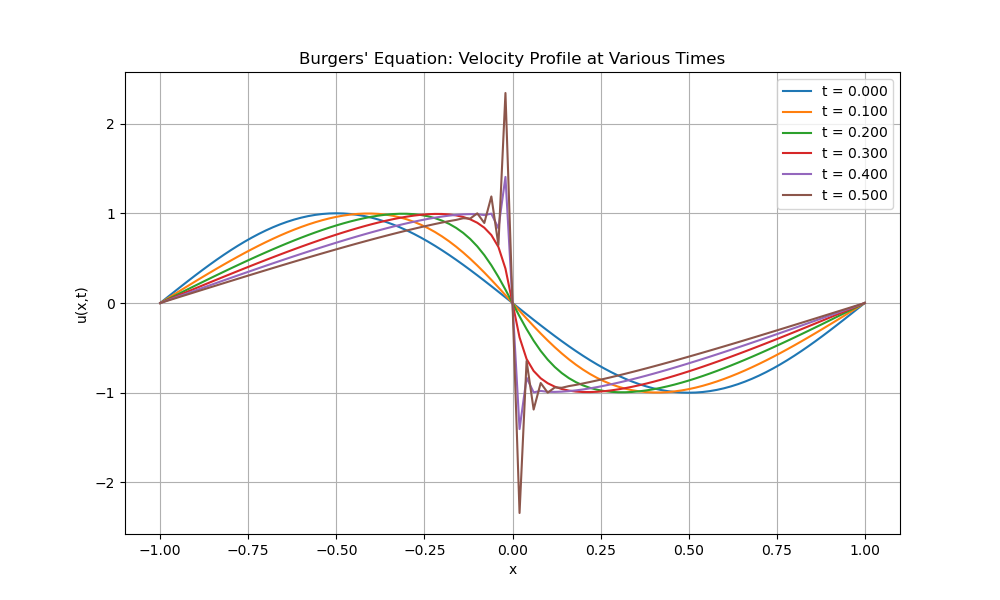

In [7]:
# Simulation parameters for Burgers' equation
nx = 101                # Number of spatial grid points
x = np.linspace(-1, 1, nx)
dx = x[1] - x[0]        # Spatial step size

nt = 500                # Number of time steps
dt = 0.001              # Time step size
nu = 0.01 / np.pi       # Viscosity parameter

# Initial condition: u(x,0) = -sin(pi*x)
u0_burgers = -np.sin(np.pi * x)
u_burgers = u0_burgers.copy()

def apply_boundary_burgers(u):
    u[0] = 0
    u[-1] = 0
    return u

u_burgers = apply_boundary_burgers(u_burgers)
snapshots_burgers = [u_burgers.copy()]

def step_burgers(u, dt, dx, nu):
    u_new = u.copy()
    # Compute finite differences for the interior points
    for i in range(1, len(u)-1):
        # Central difference for first derivative u_x
        u_x = (u[i+1] - u[i-1]) / (2*dx)
        # Central difference for second derivative u_xx
        u_xx = (u[i+1] - 2*u[i] + u[i-1]) / (dx**2)
        # Update using forward Euler: note the nonlinear term u*u_x
        u_new[i] = u[i] + dt * (-u[i] * u_x + nu * u_xx)
    u_new = apply_boundary_burgers(u_new)
    return u_new

# Time integration loop for Burgers' equation
for n in range(nt):
    u_burgers = step_burgers(u_burgers, dt, dx, nu)
    if n % 10 == 0:
        snapshots_burgers.append(u_burgers.copy())

snapshots_burgers = np.array(snapshots_burgers)
print("Burgers' equation simulation complete. Collected snapshots shape:", snapshots_burgers.shape)

# Plot the solution of Burgers' equation at a few time instants
plt.figure(figsize=(10, 6))
time_indices = np.linspace(0, snapshots_burgers.shape[0]-1, 6, dtype=int)
for idx in time_indices:
    plt.plot(x, snapshots_burgers[idx, :], label=f"t = {idx*10*dt:.3f}")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title("Burgers' Equation: Velocity Profile at Various Times")
plt.legend()
plt.grid(True)
plt.show()
